# Lab 03. 시계열 분해 간단 시각화 실습
--- 

- 추세, 계절성, 주기, 불규칙성 요소를 분리하여 간단하게 시각화 해보자.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

- 시계열 데이터를 생성하고 확인해본다.

In [2]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})

print(data)

         Date     Value
0  2023-01-01 -0.347527
1  2023-01-02  0.456365
2  2023-01-03  0.278007
3  2023-01-04  0.110488
4  2023-01-05 -0.208551
..        ...       ...
95 2023-04-06 -0.582342
96 2023-04-07  0.097976
97 2023-04-08 -0.454340
98 2023-04-09  0.188205
99 2023-04-10  0.859387

[100 rows x 2 columns]


- 시계열 분해를 하고 시각화를 해본다.

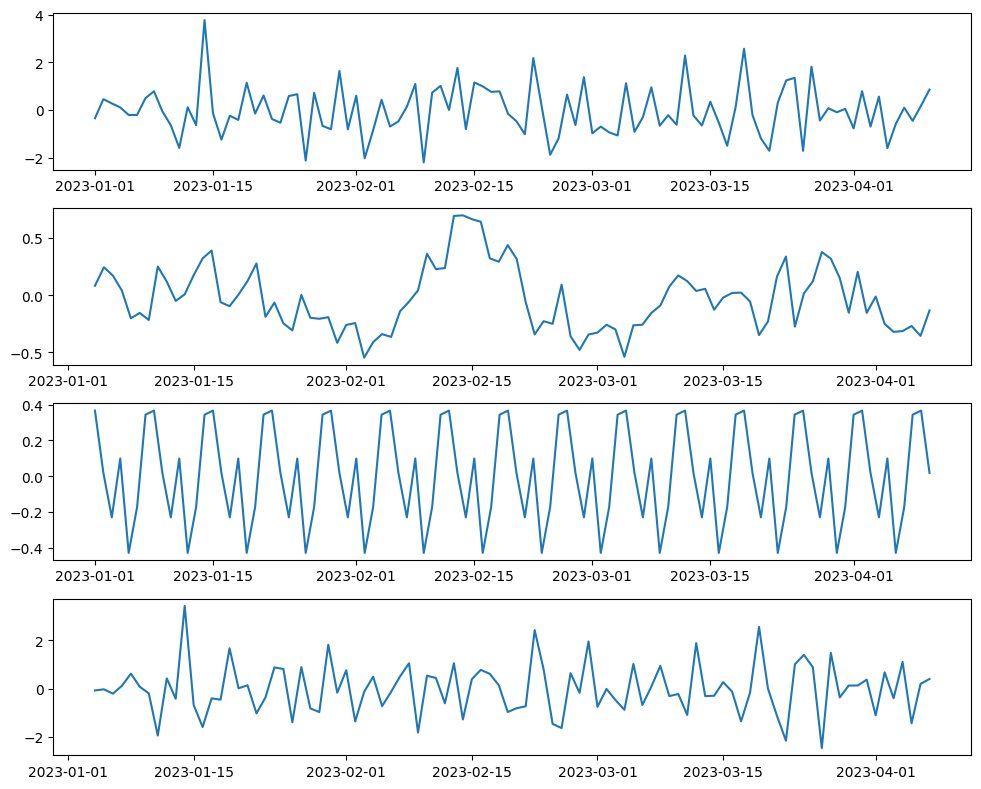

In [3]:
# 시계열 분해 
result = seasonal_decompose(data['Value'], model='additive', period=7)

# 분해 결과 시각화 
plt.figure(figsize=(10,8))

# 원본 데이터 
plt.subplot(4,1,1)
plt.plot(data['Date'], data['Value'])

# 추세 데이터 
plt.subplot(4,1,2)
plt.plot(data['Date'], result.trend)

# 계절성 데이터 
plt.subplot(4,1,3)
plt.plot(data['Date'], result.seasonal)

# 불규칙성 데이터 
plt.subplot(4,1,4)
plt.plot(data['Date'], result.resid)

plt.tight_layout()

plt.show()